In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

Remarks: We drop the following columns either because the information is redundant or completely independent to the survival rate.

<b>1. Preprocessing the data

<i>1.1. Handling null values in the column Age

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


<i>1.2. Encoding the sex

In [ ]:
enc = OneHotEncoder(sparse_output=False)
sex_enc = enc.fit_transform(np.array(df["Sex"]).reshape(-1,1))
one_hot_df = pd.DataFrame(sex_enc,columns=['Female','Male'])
df_new = pd.concat([df, one_hot_df], axis=1)
df_new = df_new.drop("Sex", axis=1)
df_new.head()

,Survived,Pclass,Age,Female,Male
0,0,3,22.0,0.0,1.0
1,1,1,38.0,1.0,0.0
2,1,3,26.0,1.0,0.0
3,1,1,35.0,1.0,0.0
4,0,3,35.0,0.0,1.0


<i>1.3. Normalising the data

In [6]:
scaler = StandardScaler()
scaler.fit_transform(df_new)

array([[-0.78927234,  0.82737724, -0.56573646, -0.73769513,  0.73769513],
       [ 1.2669898 , -1.56610693,  0.66386103,  1.35557354, -1.35557354],
       [ 1.2669898 ,  0.82737724, -0.25833709,  1.35557354, -1.35557354],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 ,  1.35557354, -1.35557354],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.73769513,  0.73769513],
       [-0.78927234,  0.82737724,  0.20276197, -0.73769513,  0.73769513]])

<b>2. Summary statistics

In [7]:
print(f"Percentage of survivors: {df_new['Survived'].sum()/len(df_new['Survived']):.2f}")
print(f"Average age of passengers: {df_new['Age'].sum()/len(df_new['Age']):.2f}")
print("Number of female passengers:",df_new['Female'].sum())
print("Number of male passengers:",df_new['Male'].sum())

Percentage of survivors: 0.38
Average age of passengers: 29.36
Number of female passengers: 314.0
Number of male passengers: 577.0


<i>2.1. Feature importance

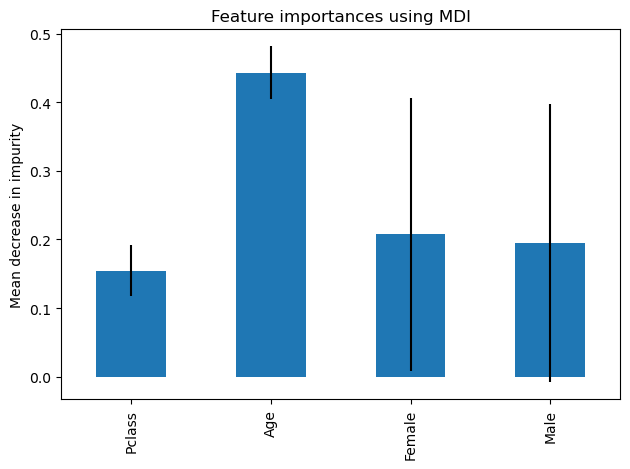

In [8]:
X = df_new.drop("Survived",axis=1,inplace=False)
y = df_new["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df_new.columns[1:])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Observation: Age and sex have higher impact on the survival rate than the passenger class

<i>2.2. Correlation matrix

In [9]:
rs = np.random.RandomState(0)
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=4)

,Survived,Pclass,Age,Female,Male
Survived,1.0000,-0.3385,-0.0649,0.5434,-0.5434
Pclass,-0.3385,1.0000,-0.3399,-0.1319,0.1319
Age,-0.0649,-0.3399,1.0000,-0.0812,0.0812
Female,0.5434,-0.1319,-0.0812,1.0000,-1.0000
Male,-0.5434,0.1319,0.0812,-1.0000,1.0000


Observations: Being a female imapcts the survival rate positively on the contrary to being a male. As expected, staying a lower class reduce the chances of survival.

<i>2.3. Visualisations

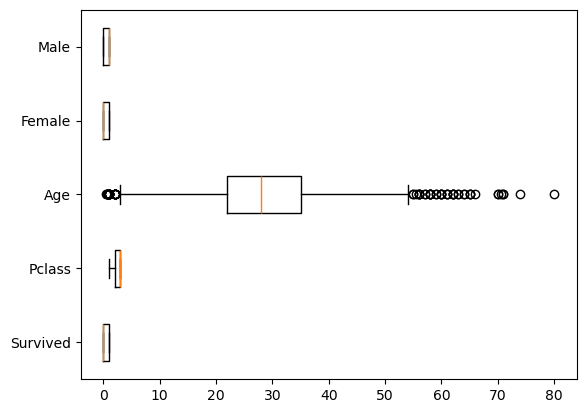

In [10]:
plt.boxplot(df_new, orientation='horizontal',tick_labels=df_new.columns)
plt.show()

Observations: Being a female imapcts the survival rate positively on the contrary to being a male. As expected, staying a lower class reduce the chances of survival.

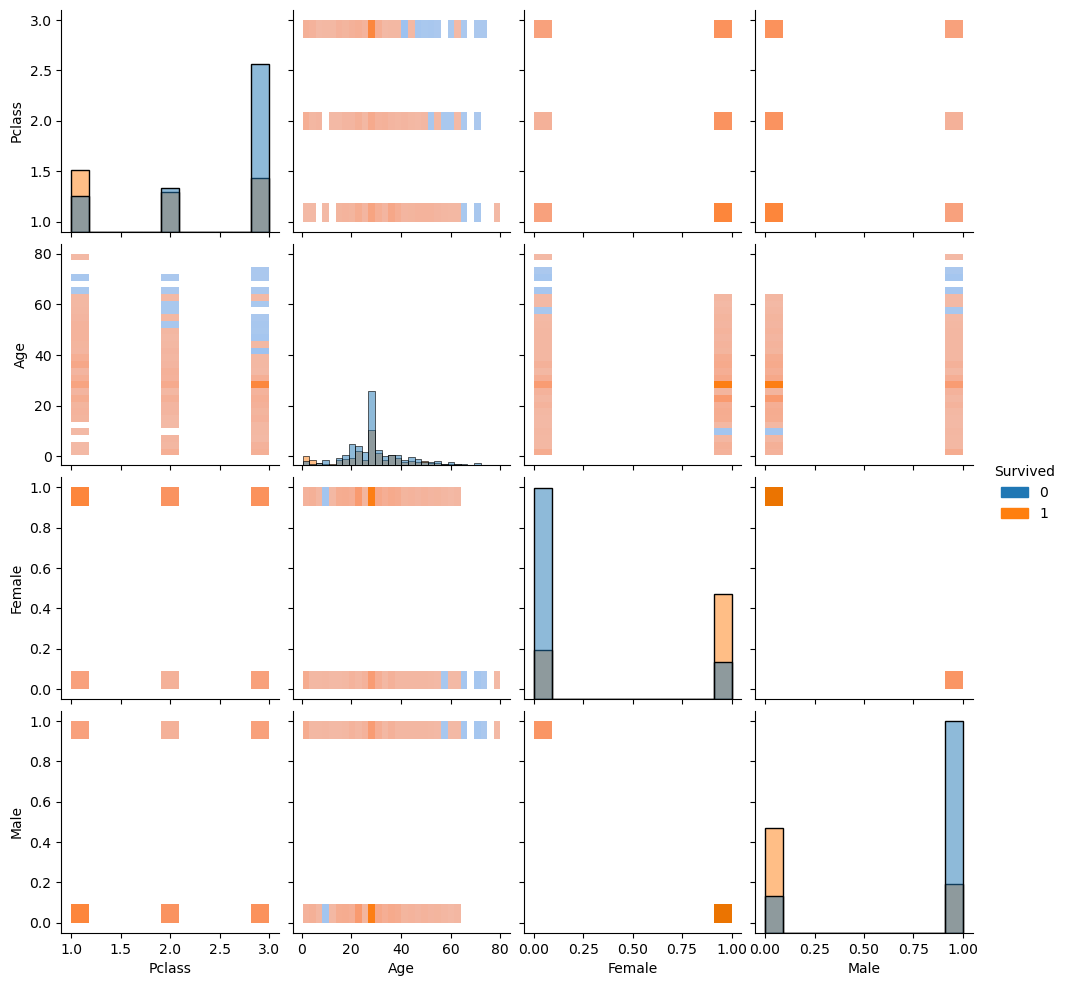

In [13]:
sns.pairplot(df_new,hue="Survived",kind='hist')